<span style="font-family:Century Gothic ; font-size:2.5em;"> DISASTER TWEETS - NLP</span>



***

<span style="font-family:Century Gothic ; font-size:1.3em;"> Twitter has become an important communication channel in times of emergency.
The ubiquitousness of smartphones enables people to announce an emergency they’re observing in real-time. Because of this, more agencies are interested in programatically monitoring Twitter (i.e. disaster relief organizations and news agencies). 
    But, it’s not always clear whether a person’s words are actually announcing a disaster.
    
</span>







<div class="alert alert-block alert-info">
<b>Statement</b> 
</div>



<span style="font-family:Century Gothic ; font-size:1.3em;"> Given a dataset with tweets , keywords and location, The project is to __Predict which tweets are about disasters and which one's aren't using the information present in dataset.__
</span>





    
<div class="alert alert-block alert-info">
<b>Tools</b> 
</div>



  - <span style="font-family:Century Gothic ; font-size:1.3em;"> Python</span>
  - <span style="font-family:Century Gothic ; font-size:1.3em;"> Pandas</span>
  - <span style="font-family:Century Gothic ; font-size:1.3em;"> Numpy</span>
  - <span style="font-family:Century Gothic ; font-size:1.3em;">Matplotlib</span>
  - <span style="font-family:Century Gothic ; font-size:1.3em;"> nltk </span>


<div class="alert alert-block alert-info">
<b>Importing Required Libraries</b> 
</div>

In [1]:
import nltk
import pandas as pd
import numpy as np
import re 
from sklearn.feature_extraction.text import TfidfVectorizer
import string
from matplotlib import pyplot
%matplotlib inline

In [16]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
sample = pd.read_csv("sample_submission.csv")
train_data.head(50)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [ ]:
train_data = train_data.sample(frac = 1).reset_index(drop = True)
label = train_data["target"]
Xfea_train = Xfea_train.drop(["target"], axis = 1)

<div class="alert alert-block alert-info">
<b>Feature Engineering</b> 
</div>

> <span style="font-family:Century Gothic ; font-size:1.3em;">Creating a column with __Text Lenght__.</span>

> <span style="font-family:Century Gothic ; font-size:1.3em;">Creating a column with __Punctuation Percentage__.</span>

In [3]:
def punc_count(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3) * 100


In [4]:
train_data["text_len"] = train_data["text"].apply(lambda x : len(x) - x.count(" "))
train_data["punc%"] = train_data["text"].apply(lambda x : punc_count(x))

test_data["text_len"] = test_data["text"].apply(lambda x : len(x) - x.count(" "))
test_data["punc%"] = test_data["text"].apply(lambda x : punc_count(x))

test_data.head()
train_data.head()

,id,keyword,location,text,target,text_len,punc%
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,57,1.8
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,32,3.1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,112,2.7
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,57,3.5
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,72,2.8


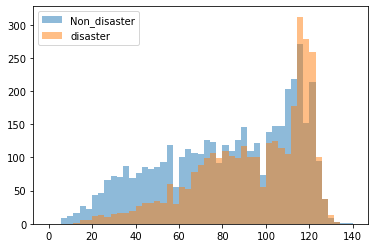

In [5]:
bins = np.linspace(0, 140, 50)

pyplot.hist(train_data[train_data["target"] == 0]["text_len"], bins, alpha = 0.5,  label = "Non_disaster")
pyplot.hist(train_data[train_data["target"] == 1]["text_len"], bins, alpha = 0.5,  label = "disaster")
pyplot.legend(loc = 'upper left')
pyplot.show()

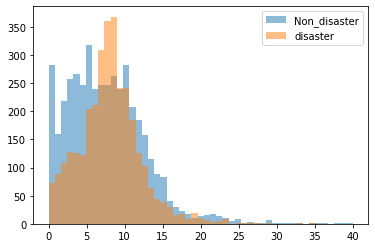

In [6]:
bins = np.linspace(0, 40, 50)

pyplot.hist(train_data[train_data["target"] == 0]["punc%"], bins, alpha = 0.5,  label = "Non_disaster")
pyplot.hist(train_data[train_data["target"] == 1]["punc%"], bins, alpha = 0.5,  label = "disaster")
pyplot.legend(loc = 'upper right')
pyplot.show()

<div class="alert alert-block alert-info">
<b>Transforming  features for Better Yeild</b> 
</div>


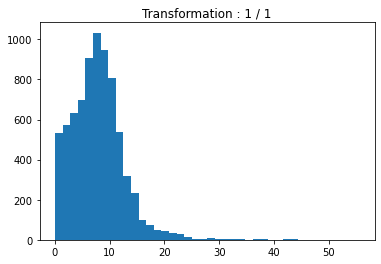

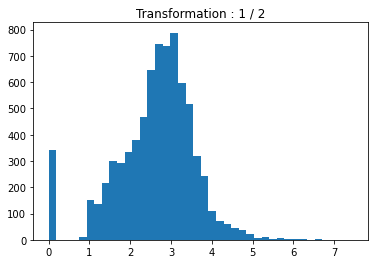

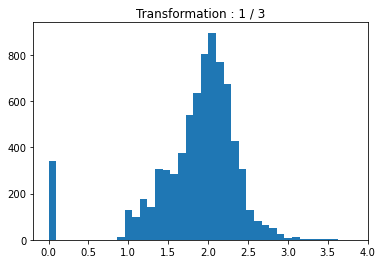

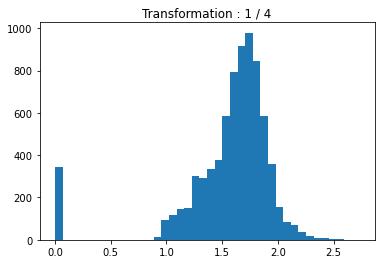

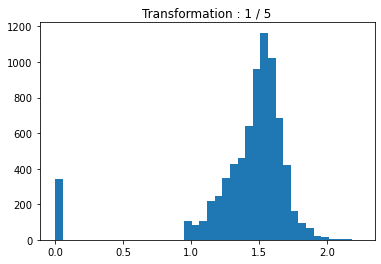

In [7]:
for x in [1, 2, 3, 4, 5]:
    pyplot.hist((train_data["punc%"]) ** (1 / x), bins = 40)
    pyplot.title("Transformation : 1 / {}".format(str(x)))
    pyplot.show()

<span style="font-family:Century Gothic ; font-size:1.3em;"> Tranformation by 5 is looking best of all </span>

In [8]:
train_data["punc%"] = train_data["punc%"] ** (1 / 5)
test_data["punc%"] = test_data["punc%"] ** (1/5)


<div class="alert alert-block alert-info">
<b>Cleaning Text</b> 
</div>

<span style="font-family:Century Gothic ; font-size:1.3em;"> Most of the words in tweets are not useful , they are used almost everywhere like __of, the, is, was, i__ etc.. and Punctuations like __".", "/", "!", "%", "?"__ .They don't necessaryly provide any kind of information many times , so we are gonna remove all of them and make the classifier concentrate on real words</span>
***
<span style="font-family:Century Gothic ; font-size:1.3em;">For that we are gonna use 
    - <span style="font-family:Century Gothic ; font-size:1.3em;">string and nltk libraries
</span> 
    
     

In [11]:
stopwords = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
stopwords

In [12]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [wn.lemmatize(word) for word in tokens if word not in stopwords]
    return text

In [13]:
tfidf = TfidfVectorizer(analyzer = clean_text)
tfidf_fit  = tfidf.fit(train_data["text"])

train_tfidf = tfidf_fit.transform(train_data["text"])
test_tfidf = tfidf_fit.transform(test_data["text"])

pd.DataFrame(test_tfidf.toarray()).shape

(3263, 21000)

In [13]:
train_data = train_data.drop(["location", "text"], axis = 1)
test_data = test_data.drop(["location", "text"], axis = 1)
test_data

,id,keyword,text_len,punc%
0,0,NaN,29,0.000000
1,2,NaN,56,1.401131
2,3,NaN,78,1.210583
3,9,NaN,37,1.519487
4,11,NaN,38,0.000000
...,...,...,...,...
3258,10861,NaN,48,0.000000
3259,10865,NaN,117,1.338732
3260,10868,NaN,50,1.584893
3261,10874,NaN,59,1.641003


<div class="alert alert-block alert-info">
<b>Getting all the important data Together</b> 
</div>

> <span style="font-family:Century Gothic ; font-size:1.3em;">Creating dummies for keyword because,  some keywords totally define wheather the tweet is about a disaster or not.so we are gonna create seperate columns for each unique keyword.They become important features for Predicting.
</span>

In [14]:
Xfea_train = pd.concat([train_data['keyword'],train_data['punc%'], pd.DataFrame(train_tfidf.toarray())], axis = 1)
Xfea_test = pd.concat([test_data['keyword'], test_data['punc%'], pd.DataFrame(test_tfidf.toarray())], axis = 1)
Xfea_train = pd.get_dummies(Xfea_train, columns = ["keyword"])
Xfea_test = pd.get_dummies(Xfea_test, columns = ["keyword"])
Xfea_train.head()

,target,punc%,0,1,2,3,4,5,6,7,...,keyword_weapons,keyword_whirlwind,keyword_wild%20fires,keyword_wildfire,keyword_windstorm,keyword_wounded,keyword_wounds,keyword_wreck,keyword_wreckage,keyword_wrecked
0,1,1.124746,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,1.253927,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1,1.219755,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1,1.284735,0.214021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1,1.228660,0.177827,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
Xfea_test.head()

,punc%,0,1,2,3,4,5,6,7,8,...,keyword_weapons,keyword_whirlwind,keyword_wild%20fires,keyword_wildfire,keyword_windstorm,keyword_wounded,keyword_wounds,keyword_wreck,keyword_wreckage,keyword_wrecked
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1.401131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1.210583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1.519487,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier


In [18]:
#rf = RandomForestClassifier()
#k_fold = KFold(n_splits = 2)
#X_feat_shuf = X_features.sample(frac = 1).reset_index(drop = True)
#label = X_feat_shuf["target"]
#X_feat = X_feat_shuf.drop(["target"], axis = 1)
#cross_val_score(rf, X_feat, label, cv = k_fold, scoring = 'f1')

In [19]:
#Xfea_train = Xfea_train.sample(frac = 1).reset_index(drop = True)
#label = Xfea_train["target"]
#Xfea_train = Xfea_train.drop(["target"], axis = 1)

In [45]:
ran_f = RandomForestClassifier()

params = {
          "n_estimators" : [260],
          "max_depth"  : [ None]
}
skf = StratifiedKFold(n_splits = 2)

resu_rf = GridSearchCV(estimator = ran_f,
                  param_grid = params,
                  cv = skf,
                  verbose = 1,
                  scoring = "accuracy"
                 )
resu_rf.fit(Xfea_train, label)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None], 'n_estimators': [260]},
             scoring='accuracy', verbose=1)

In [46]:
resu_rf.best_score_

0.7816885563985141

In [47]:
resu_rf.best_params_

{'max_depth': None, 'n_estimators': 260}

In [48]:
results = resu_rf.predict(Xfea_test)

In [49]:
results

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [50]:
sample["target"] = results 
sample

,id,target
0,0,0
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1


In [51]:
sample.to_csv("sub6.csv", index = False)